    # Automatic Jupyter Notebook for OpenML dataset 150: covertype

In [1]:
%matplotlib inline
from scripts.preamble import *
did = 150
data = oml.datasets.get_dataset(did)
X, y, features = getData(data)
task, topList, strats, scores = getOpenMLData(did, data.default_target_attribute) 
topList[:10] 

,flow,score
0,weka.Bagging_J48(2),0.997148
1,weka.END_ND_J48(2),0.996268
2,sklearn.ensemble.forest.RandomForestClassifier...,0.995326
3,sklearn.ensemble.forest.RandomForestClassifier...,0.995304
4,weka.RandomCommittee_RandomTree(2),0.992928
5,sklearn.ensemble.forest.RandomForestClassifier...,0.991304
6,sklearn.ensemble.forest.RandomForestClassifier...,0.991180
7,sklearn.tree.tree.DecisionTreeClassifier(22),0.954320
8,sklearn.tree.tree.DecisionTreeClassifier(22),0.954229
9,sklearn.tree.tree.DecisionTreeClassifier(22),0.954223


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


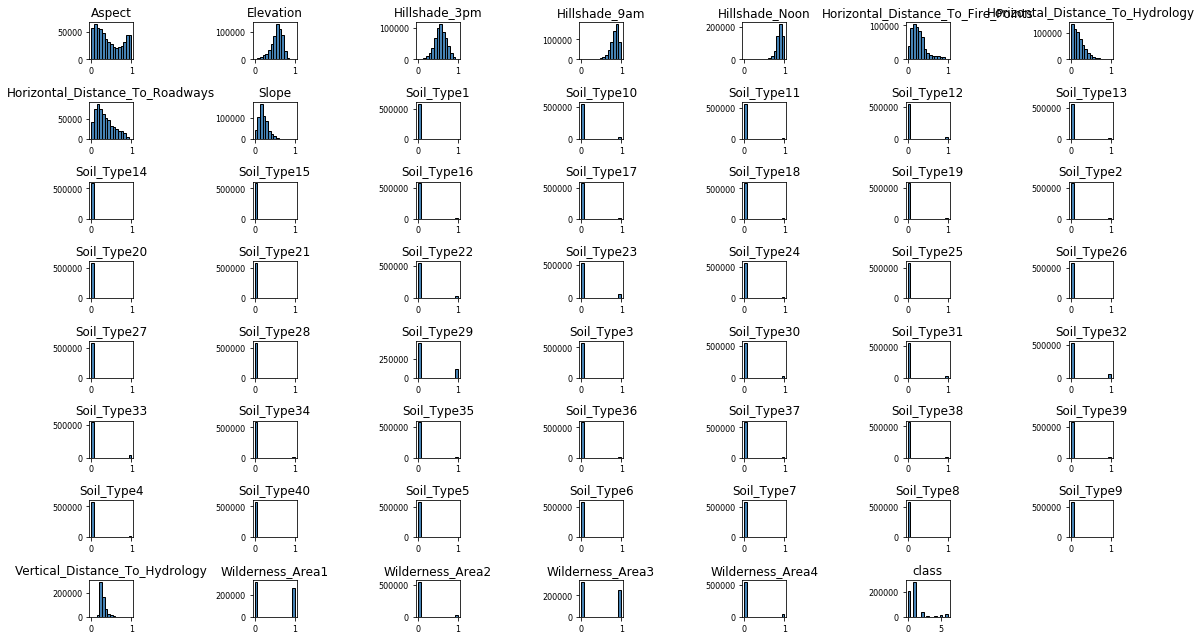

In [3]:
from scripts.dataVisualization import *
show1DHist(data) 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,outlier
537886,0.763382,0.936111,0.545455,0.212598,0.399225,0.130954,0.472441,0.653543,0.673228,0.204238,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.0114869
10452,0.798899,0.944444,0.590909,0.23121,0.453488,0.161585,0.440945,0.606299,0.641732,0.228775,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.0107733
539794,0.803402,0.952778,0.545455,0.2398,0.466408,0.161023,0.496063,0.633858,0.625984,0.230169,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.0107733
539540,0.790395,0.927778,0.606061,0.221188,0.427649,0.156808,0.409449,0.61811,0.685039,0.226126,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00997778
539270,0.786393,0.911111,0.575758,0.214746,0.439276,0.152311,0.413386,0.661417,0.740157,0.223756,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00996028
14779,0.769385,0.922222,0.575758,0.198282,0.409561,0.139104,0.42126,0.645669,0.708661,0.215252,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00979516
537885,0.758879,0.936111,0.545455,0.198282,0.390181,0.130673,0.472441,0.653543,0.669291,0.205911,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00950489
539538,0.784392,0.961111,0.606061,0.204009,0.416021,0.157932,0.444882,0.566929,0.582677,0.223616,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00923704
539537,0.77939,0.95,0.621212,0.198282,0.396641,0.158775,0.42126,0.574803,0.61811,0.222362,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00923704
539003,0.776888,0.911111,0.575758,0.198282,0.419897,0.148096,0.405512,0.653543,0.732283,0.219852,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.00858201


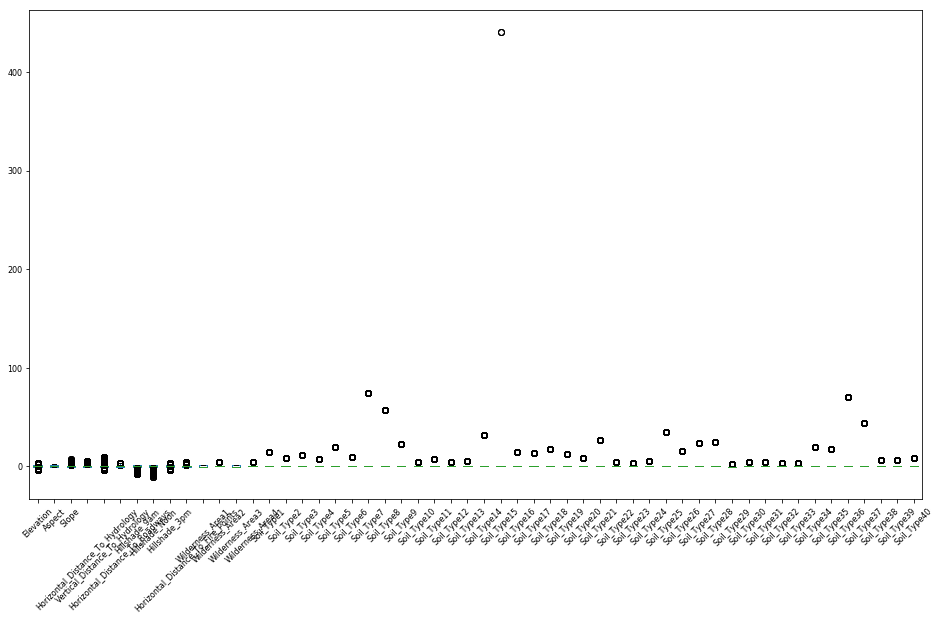

In [4]:
from scripts.outlierDetection import *
outlierDetection(X, features, 10) 

In [5]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

    did                 name  similarity                            url
0  1408   BNG(lymph,10000,1)       0.870  https://www.openml.org/d/1408
1  1596            covertype       0.870  https://www.openml.org/d/1596
2   665      sleuth_case2002       0.868   https://www.openml.org/d/665
3  1405    BNG(lymph,5000,1)       0.867  https://www.openml.org/d/1405
4  1409   BNG(lymph,10000,5)       0.859  https://www.openml.org/d/1409
5  1402    BNG(lymph,1000,1)       0.857  https://www.openml.org/d/1402
6  1406    BNG(lymph,5000,5)       0.857  https://www.openml.org/d/1406
7  1410  BNG(lymph,10000,10)       0.857  https://www.openml.org/d/1410
8  1407   BNG(lymph,5000,10)       0.855  https://www.openml.org/d/1407
9  1403    BNG(lymph,1000,5)       0.854  https://www.openml.org/d/1403


Complexity threshold to determine if an algorithm will be run.


In [6]:
comp = 50000000000000

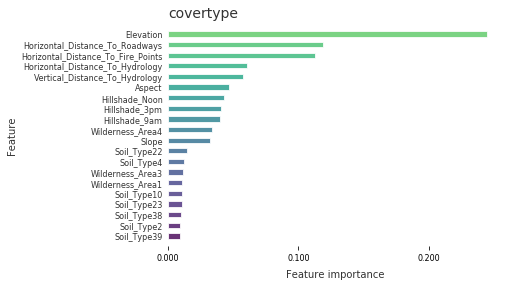

In [7]:
from scripts.featureImportance import *
featureImportance(data) 

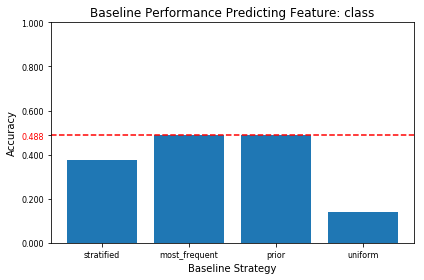

In [8]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

Please run the full notebook then toggle removeOutliers and run this cell and the next to compare the algorithms with and without outliers. 

In [9]:
removeOutliers = False 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Run already exists in OpenML, WIP
Skipping run because of time limit set
Skipping run because of time limit set
Skipping run because of time limit set


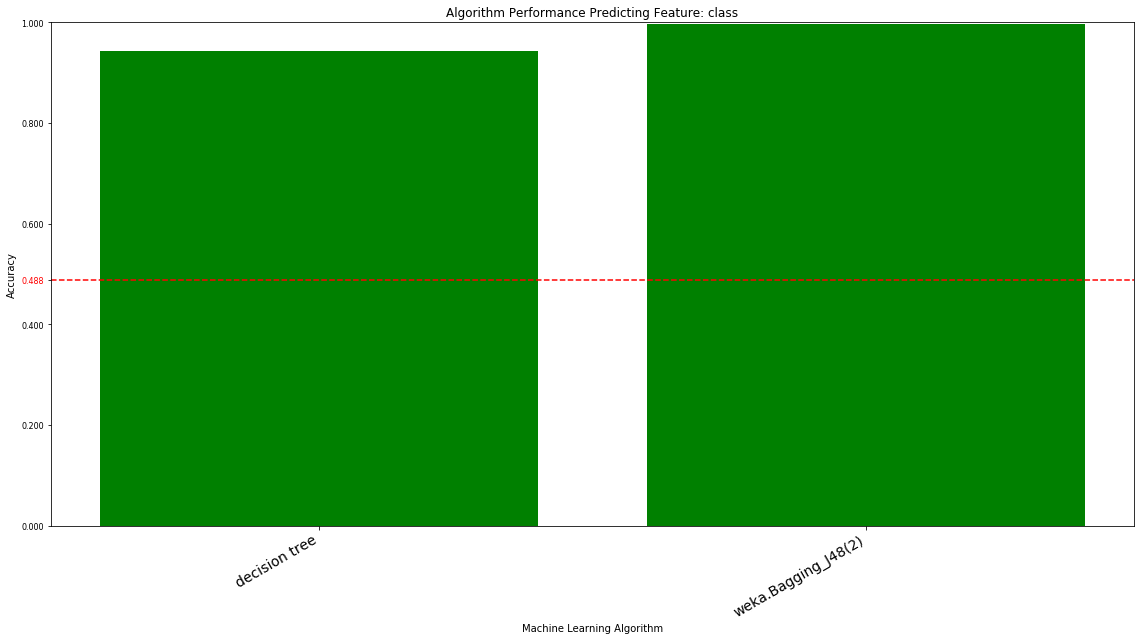

In [10]:
from scripts.machineLearningAlgorithms import *
settings = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=False, runTPOT=False, removeOutliers=removeOutliers)
plot_alg(data, settings.strats, maxBaseline, problemType) 

Run already exists in OpenML, WIP


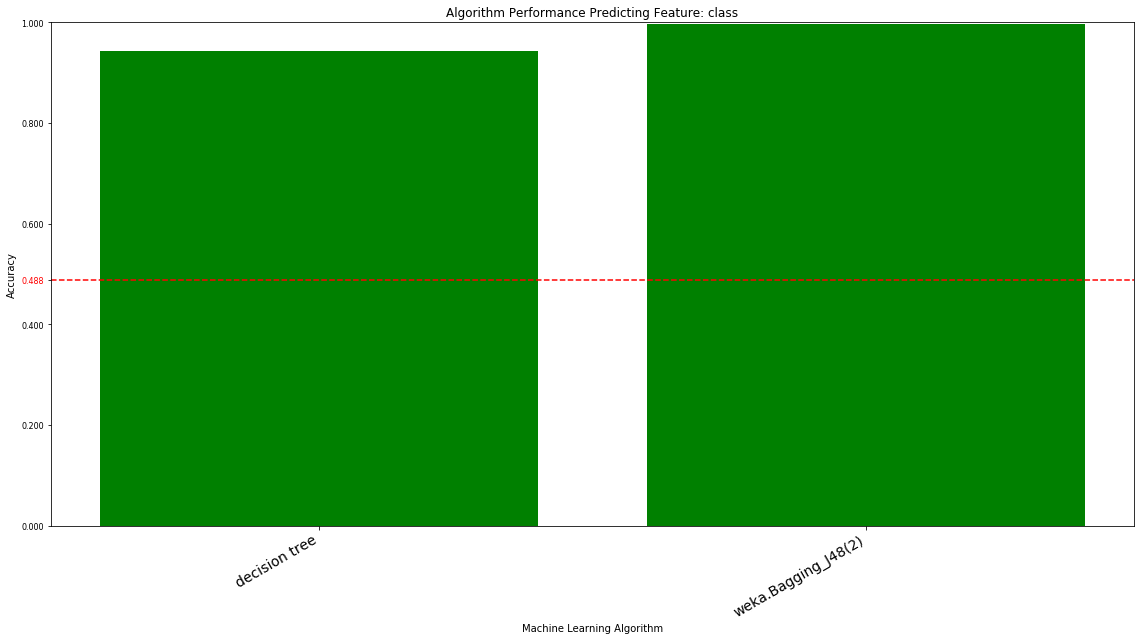

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Create a custom algorithm by setting classifier and name
#---------------------------------------------------
clf =  QuadraticDiscriminantAnalysis()
name = "CustomAlgorithmQuadraticDiscriminantAnalysis"
#---------------------------------------------------
runMLAlgorithm(estimator=clf, name=name, settings=settings)
plot_alg(data, settings.strats, maxBaseline, problemType) 

In [12]:
%matplotlib nbagg
from scripts.relativePerformance import * 
showRelativePerformanceBoxplot(scores, topList, settings.strats, maxBaseline) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>